# Import required libraries

In [25]:
!pip install wordcloud

import pandas as pd
import numpy as np
import warnings
import regex as re
warnings.filterwarnings('ignore')#to filter all the warnings
import seaborn as sns
pd.set_option('float_format', '{:.4f}'.format)# to keep the float values short
# Import for wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import fot plotly
import plotly.express as px

In [113]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

# Data Description

YouTube Trending Statistics - Consists of updated daily records of top trending YouTube videos, based on viewership metrics such as likes, dislikes and views and provides interesting parameters such as tag or country for further analysis.

File type: csv
video_id: Uniquely identifies each video
published_at: Date and Time of video published
categoryId: Id of category the video belongs to
trending_date: Date and time when the video got to Trending
view_count: Number of views (cumulative)
likes: Number of Likes(cumulative)
dislikes: Number of dislikes(cumulative)
comment_count: Number of comments(cumulative)
country: Country in which the video was trending
description: Description of video by the creator
tags: Tags of the video by the creator
title: Title of the video
channelTitle: Channel Title of the video
thumbnail_link:link for thumbnails
comments_disabled: boolean value that defines if viewer can comment
ratings_disabled: boolean value that defines if viewer can rate through likes and dislikes
channelId: uniquely defines the channel the video is coming from

File type: json
id: Id of category the video belongs to
name: Respective category names of category ids

# Module 2: Data Preprocessing

### Data Viewing 

In [26]:
US_Videos_df = pd.read_csv('USvideos.csv')
US_Videos_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [27]:
CA_Videos_df = pd.read_csv('CAvideos.csv')
CA_Videos_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...


In [28]:
DE_Videos_df = pd.read_csv('DEvideos.csv')
DE_Videos_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...


In [29]:
FR_Videos_df = pd.read_csv('FRvideos.csv')
FR_Videos_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...


In [30]:
GB_Videos_df = pd.read_csv('GBvideos.csv')
GB_Videos_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...


In [31]:
IN_Videos_df = pd.read_csv('INvideos.csv')
IN_Videos_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...


In [32]:
JP_Videos_df = pd.read_csv('JPvideos.csv', encoding='iso-8859-1')
JP_Videos_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...


In [33]:
# KR_Videos_df = pd.read_csv('KRvideos.csv', encoding='cp949
#KR_Videos_df = pd.read_csv('KRvideos.csv', encoding='utf-8', errors='ignore')

In [34]:
# MX_Videos_df = pd.read_csv('MXvideos.csv')
#MX_Videos_df.head(1)

In [35]:
#RU_Videos_df = pd.read_csv('RUvideos.csv')
#RU_Videos_df.head(1)

### Opening JSON file and loading the required data to match categoryId to its respective category name:

In [36]:
import json #import data using python json module
with open('CA_category_id.json','r') as f:
    category_data_ca= json.loads(f.read())

In [37]:
with open('US_category_id.json','r') as f:
    category_data_us= json.loads(f.read())

In [38]:
with open('DE_category_id.json','r') as f:
    category_data_de= json.loads(f.read())

In [39]:
with open('FR_category_id.json','r') as f:
    category_data_fr= json.loads(f.read())

In [40]:
with open('GB_category_id.json','r') as f:
    category_data_gb= json.loads(f.read())

In [41]:
with open('IN_category_id.json','r') as f:
    category_data_in= json.loads(f.read())

In [42]:
with open('JP_category_id.json','r') as f:
    category_data_jp= json.loads(f.read())

In [ ]:
#Since JSON file was in nested format we used json normalize function from pandas to flatten it and read into data frame
# Assuming the category data for each country is already loaded into respective variables
JP_cat = pd.json_normalize(category_data_jp, record_path='items')
US_cat = pd.json_normalize(category_data_us, record_path='items')
CA_cat = pd.json_normalize(category_data_ca, record_path='items')
GB_cat = pd.json_normalize(category_data_gb, record_path='items')
FR_cat = pd.json_normalize(category_data_fr, record_path='items')  # Make sure this variable name is correct (fg or fr?)
DE_cat = pd.json_normalize(category_data_de, record_path='items')
IN_cat = pd.json_normalize(category_data_in, record_path='items')


In [ ]:
# Converting the 'id' extracted from the json file to type 'int'
US_cat['id']= US_cat['id'].astype(int)
CA_cat['id']= CA_cat['id'].astype(int)
GB_cat['id']= GB_cat['id'].astype(int)
FR_cat['id']= FR_cat['id'].astype(int)
DE_cat['id']= DE_cat['id'].astype(int)
IN_cat['id']= IN_cat['id'].astype(int)
JP_cat['id']= JP_cat['id'].astype(int)

In [51]:
#Merging videos dataframe and category dataframe for all countries using left join
US_Videos_df = US_Videos_df.merge(US_cat, how='left', left_on='category_id', right_on='id').rename(columns={'snippet.title': 'category_name'})
CA_Videos_df = CA_Videos_df.merge(CA_cat, how='left', left_on='category_id', right_on='id').rename(columns={'snippet.title': 'category_name'})
GB_Videos_df = GB_Videos_df.merge(GB_cat, how='left', left_on='category_id', right_on='id').rename(columns={'snippet.title': 'category_name'})
DE_Videos_df = DE_Videos_df.merge(DE_cat, how='left', left_on='category_id', right_on='id').rename(columns={'snippet.title': 'category_name'})
FR_Videos_df = FR_Videos_df.merge(FR_cat, how='left', left_on='category_id', right_on='id').rename(columns={'snippet.title': 'category_name'})
IN_Videos_df = IN_Videos_df.merge(IN_cat, how='left', left_on='category_id', right_on='id').rename(columns={'snippet.title': 'category_name'})
JP_Videos_df = JP_Videos_df.merge(JP_cat, how='left', left_on='category_id', right_on='id').rename(columns={'snippet.title': 'category_name'})


In [52]:
#  Adding a column 'country' to identify country specific information after appending the 3 countries - USA, Great Britain, Canada
US_Videos_df['country']= 'USA'
CA_Videos_df['country']= 'Canada'
GB_Videos_df['country']= 'Great Britain'
DE_Videos_df['country']= 'Germany'
FR_Videos_df['country']= 'France'
IN_Videos_df['country']= 'India'
JP_Videos_df['country']= 'Japan'

In [53]:
# Making a list of all countries and using pd.concat function to append data for all countries in one dataframe
df_list= [US_Videos_df,DE_Videos_df,FR_Videos_df,GB_Videos_df,IN_Videos_df,JP_Videos_df]

In [54]:
df= pd.concat(df_list).reset_index(drop=True)

In [57]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,category_name,snippet.assignable,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22.0000,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,"One year after the presidential election, John...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24.0000,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True,USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/G9LHzQmx44rX2S5ya...",23.0000,UCBR8-60-B28hp2BmDPdntcQ,Comedy,True,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,Today we find out if Link is a Nickelback amat...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24.0000,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,I know it's been a while since we did this sho...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24.0000,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219299,GuWCkLnCMOo,18.14.06,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,Ch3Thailand,24,2018-06-13T17:00:01.000Z,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,81321,321,17,...,False,False,à¸«à¸¥à¸±à¸à¸à¸à¸¥à¸°à¸à¸£à¸à¸²à¸à¸«à¸à...,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",24.0000,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True,Japan
219300,nOUlB0i2MaA,18.14.06,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,25,2018-06-13T19:10:31.000Z,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,...,True,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...",25.0000,UCBR8-60-B28hp2BmDPdntcQ,News & Politics,True,Japan
219301,4cRanIowkTE,18.14.06,å FBIã¨ã¼ã¸ã§ã³ããæããã200ï¼ ä...,ãã©ã¤ããµã¤ã | Bright Side Japan,26,2018-06-13T14:00:02.000Z,"äººã ãé­ äºããæ¹æ³|""é­ åçã«ãªã...",39235,1194,27,...,False,False,å FBIã¨ã¼ã¸ã§ã³ããã¸ã£ãã¯ï½¥ã·ã...,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/r6Ck6Z0_L0rG37VJQ...",26.0000,UCBR8-60-B28hp2BmDPdntcQ,Howto & Style,True,Japan
219302,oLtWIVBVoS8,18.14.06,æ¥æ¬Ããã©ã°ã¢ã¤å¾¹åºåæ&ã¹ãã¤ã...,Leo the football TV,17,2018-06-13T13:56:47.000Z,"Wæ¯|""ã¯ã¼ã«ãã«ãã""|""è¹´ç""|""ææ³å...",49900,431,66,...,False,False,ãï¼ï¼ï¼ï¼ï¼·æ¯ã­ã·ã¢å¤§ä¼æ¥æ¬ä»£è...,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...",17.0000,UCBR8-60-B28hp2BmDPdntcQ,Sports,True,Japan


In [55]:
df.groupby('country')['video_id'].count()

country
France           40724
Germany          40840
Great Britain    38916
India            37352
Japan            20523
USA              40949
Name: video_id, dtype: int64

In [56]:
df.shape

(219304, 23)

In [65]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'kind', 'etag', 'id',
       'snippet.channelId', 'category_name', 'snippet.assignable', 'country'],
      dtype='object')

# Data Cleaning 

In [60]:
#Dropping columns that are irrelevant for analysis:
df.drop(columns=['thumbnail_link','kind','etag','id','snippet.assignable','snippet.channelId'], axis='columns').shape
# safely dropped without disturbing the rows

(219304, 17)

In [66]:
# using inplace = true parameter with drop
df.drop(columns=['thumbnail_link','kind','etag','id','snippet.assignable',\
                 'snippet.channelId'], axis='columns',inplace=True)

In [68]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA


### Data coherency

Finding if there are any True values in comments_disabled and ratings_disabled columns, which represents that comment_count is 0 if comments_disabled is True, and likes ,dislikes should be 0 if ratings_disabled is True¶

In [73]:
df[df.comments_disabled==True]['comment_count']

31        0
103       0
290       0
372       0
483       0
         ..
219152    0
219213    0
219230    0
219252    0
219257    0
Name: comment_count, Length: 5867, dtype: int64

In [71]:
df[df.ratings_disabled==True][['likes','dislikes']]

,likes,dislikes
1435,0,0
1667,0,0
1868,0,0
1914,0,0
2081,0,0
...,...,...
219135,0,0
219152,0,0
219195,0,0
219257,0,0


In [74]:
df[df.comments_disabled==True].comment_count.sum()

0

In [75]:
df[df.ratings_disabled==True][['likes','dislikes']].sum()

likes       0
dislikes    0
dtype: int64

The records with True values in Comments_disabled and ratings_disabled have 0 corresponding values(likes, dislikes,comment_count).Hence the data is coherent and it is safe to drop the above 2 columns¶

In [76]:
df.drop(columns=['comments_disabled','ratings_disabled'],axis=1,inplace=True)

In [77]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John...",Entertainment,USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...,Entertainment,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...,Entertainment,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219299,GuWCkLnCMOo,18.14.06,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,Ch3Thailand,24,2018-06-13T17:00:01.000Z,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,81321,321,17,61,False,à¸«à¸¥à¸±à¸à¸à¸à¸¥à¸°à¸à¸£à¸à¸²à¸à¸«à¸à...,Entertainment,Japan
219300,nOUlB0i2MaA,18.14.06,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,25,2018-06-13T19:10:31.000Z,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...,News & Politics,Japan
219301,4cRanIowkTE,18.14.06,å FBIã¨ã¼ã¸ã§ã³ããæããã200ï¼ ä...,ãã©ã¤ããµã¤ã | Bright Side Japan,26,2018-06-13T14:00:02.000Z,"äººã ãé­ äºããæ¹æ³|""é­ åçã«ãªã...",39235,1194,27,46,False,å FBIã¨ã¼ã¸ã§ã³ããã¸ã£ãã¯ï½¥ã·ã...,Howto & Style,Japan
219302,oLtWIVBVoS8,18.14.06,æ¥æ¬Ããã©ã°ã¢ã¤å¾¹åºåæ&ã¹ãã¤ã...,Leo the football TV,17,2018-06-13T13:56:47.000Z,"Wæ¯|""ã¯ã¼ã«ãã«ãã""|""è¹´ç""|""ææ³å...",49900,431,66,336,False,ãï¼ï¼ï¼ï¼ï¼·æ¯ã­ã·ã¢å¤§ä¼æ¥æ¬ä»£è...,Sports,Japan


### Check for Null Values

In [78]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
video_error_or_removed       0
description               8331
category_name              583
country                      0
dtype: int64

In [88]:
# dealing with missing category name 

#create a combined category dataframe that includes all catgegort id to category name mappings for all countries
all_categories_df = pd.concat([US_cat, DE_cat, FR_cat, GB_cat, IN_cat, JP_cat])
# create the function to filll missing categpry names
def fill_missing_category_names(df, category_df):
    # Mapping from category_id to category_name
    category_map = dict(zip(category_df['id'], category_df['snippet.title']))

# Fill missing category_name using category_id
    df['category_name'] = df.apply(
        lambda row: category_map.get(row['category_id'], 'Unknown') if pd.isnull(row['category_name']) else row['category_name'],
        axis=1
    )
    return df

# Use the function to fill missing category names
df = fill_missing_category_names(df, all_categories_df)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John...",Entertainment,USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...,Entertainment,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...,Entertainment,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219299,GuWCkLnCMOo,18.14.06,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,Ch3Thailand,24,2018-06-13T17:00:01.000Z,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,81321,321,17,61,False,à¸«à¸¥à¸±à¸à¸à¸à¸¥à¸°à¸à¸£à¸à¸²à¸à¸«à¸à...,Entertainment,Japan
219300,nOUlB0i2MaA,18.14.06,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,25,2018-06-13T19:10:31.000Z,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...,News & Politics,Japan
219301,4cRanIowkTE,18.14.06,å FBIã¨ã¼ã¸ã§ã³ããæããã200ï¼ ä...,ãã©ã¤ããµã¤ã | Bright Side Japan,26,2018-06-13T14:00:02.000Z,"äººã ãé­ äºããæ¹æ³|""é­ åçã«ãªã...",39235,1194,27,46,False,å FBIã¨ã¼ã¸ã§ã³ããã¸ã£ãã¯ï½¥ã·ã...,Howto & Style,Japan
219302,oLtWIVBVoS8,18.14.06,æ¥æ¬Ããã©ã°ã¢ã¤å¾¹åºåæ&ã¹ãã¤ã...,Leo the football TV,17,2018-06-13T13:56:47.000Z,"Wæ¯|""ã¯ã¼ã«ãã«ãã""|""è¹´ç""|""ææ³å...",49900,431,66,336,False,ãï¼ï¼ï¼ï¼ï¼·æ¯ã­ã·ã¢å¤§ä¼æ¥æ¬ä»£è...,Sports,Japan


In [92]:
# Replace missing descriptions with "No description"
df['description'] = df['description'].fillna("No description")

In [93]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John...",Entertainment,USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...,Entertainment,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...,Entertainment,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219299,GuWCkLnCMOo,18.14.06,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,Ch3Thailand,24,2018-06-13T17:00:01.000Z,à¸«à¸à¸¶à¹à¸à¸à¹à¸²à¸§à¸à¹à¸²à¹à¸à¸µà...,81321,321,17,61,False,à¸«à¸¥à¸±à¸à¸à¸à¸¥à¸°à¸à¸£à¸à¸²à¸à¸«à¸à...,Entertainment,Japan
219300,nOUlB0i2MaA,18.14.06,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,25,2018-06-13T19:10:31.000Z,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...,News & Politics,Japan
219301,4cRanIowkTE,18.14.06,å FBIã¨ã¼ã¸ã§ã³ããæããã200ï¼ ä...,ãã©ã¤ããµã¤ã | Bright Side Japan,26,2018-06-13T14:00:02.000Z,"äººã ãé­ äºããæ¹æ³|""é­ åçã«ãªã...",39235,1194,27,46,False,å FBIã¨ã¼ã¸ã§ã³ããã¸ã£ãã¯ï½¥ã·ã...,Howto & Style,Japan
219302,oLtWIVBVoS8,18.14.06,æ¥æ¬Ããã©ã°ã¢ã¤å¾¹åºåæ&ã¹ãã¤ã...,Leo the football TV,17,2018-06-13T13:56:47.000Z,"Wæ¯|""ã¯ã¼ã«ãã«ãã""|""è¹´ç""|""ææ³å...",49900,431,66,336,False,ãï¼ï¼ï¼ï¼ï¼·æ¯ã­ã·ã¢å¤§ä¼æ¥æ¬ä»£è...,Sports,Japan


In [ ]:
# I keep the non-english words in this dataset

# Data Transformation

### Converting Datatypes for Analysis
#### 1. Convert to datetime format and remove time zones 2. convert country to category


In [94]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
video_error_or_removed      bool
description               object
category_name             object
country                   object
dtype: object

In [97]:
df['publish_time'] = pd.to_datetime(df['publish_time']).dt.tz_localize(None)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['country']= df['country'].astype('category')
df.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
video_error_or_removed              bool
description                       object
category_name                     object
country                         category
dtype: object

In [98]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description,category_name,country
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John...",Entertainment,USA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,USA
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...,Entertainment,USA
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...,Entertainment,USA


### Data Correctness

In [102]:
# Dropping records with likes > view_count
df[df.likes>df.views].sum()

video_id                 0.0000
title                    0.0000
channel_title            0.0000
category_id              0.0000
tags                     0.0000
views                    0.0000
likes                    0.0000
dislikes                 0.0000
comment_count            0.0000
video_error_or_removed   0.0000
description              0.0000
category_name            0.0000
dtype: float64

In [103]:
df.reset_index(drop=True, inplace=True)


### Now the dataset is cleaned and ready for exploration

# Data Analysis and Statistics

       category_id          views        likes     dislikes  comment_count
count  219304.0000    219304.0000  219304.0000  219304.0000    219304.0000
mean       19.8369   1885398.3905   50407.8828    2773.3127      5326.7246
std         7.2959   9041980.9286  197741.1184   27066.6132     29796.6597
min         1.0000       223.0000       0.0000       0.0000         0.0000
25%        17.0000     60963.2500     866.0000      54.0000       120.0000
50%        23.0000    251377.0000    4853.5000     251.0000       588.0000
75%        24.0000    947676.2500   24937.2500    1029.0000      2512.2500
max        44.0000 424538912.0000 5613827.0000 1944971.0000   1626501.0000


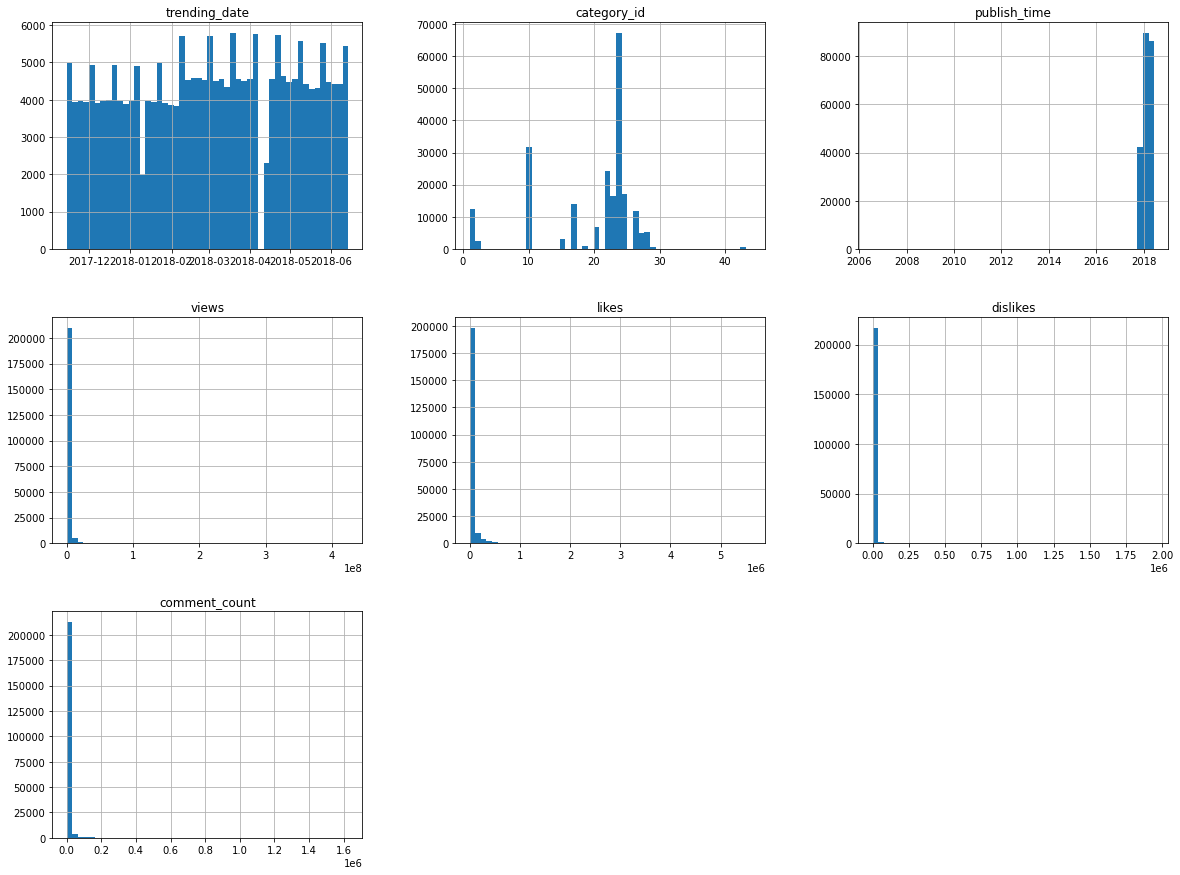

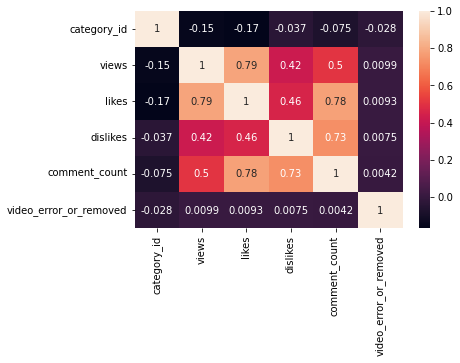

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical summary
print(df.describe())

# Histograms or boxplots for distribution of numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Entertainment            67170
Music                    31692
People & Blogs           24382
News & Politics          17032
Comedy                   16334
Sports                   13943
Film & Animation         12333
Howto & Style            11824
Gaming                    6725
Science & Technology      5237
Education                 5065
Pets & Animals            3072
Autos & Vehicles          2426
Travel & Events            909
Nonprofits & Activism      640
Shows                      488
Movies                      29
Trailers                     3
Name: category_name, dtype: int64
                             views       likes   dislikes  comment_count
category_name                                                           
Autos & Vehicles       418149.6113   6749.0132   331.0107       942.6096
Comedy                 966485.6825  45731.2382  1544.8448      4425.7116
Education              403706.2622  17896.9356   522.7038      1919.9765
Entertainment         1193382.0065  31214.3

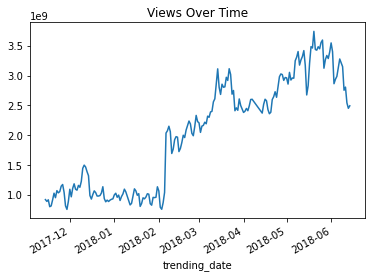

In [110]:
# Most popular categories
popular_categories = df['category_name'].value_counts()
print(popular_categories)

# Average views, likes, dislikes, and comment_count by category
average_metrics_by_category = df.groupby('category_name')['views', 'likes', 'dislikes', 'comment_count'].mean()
print(average_metrics_by_category)

# Trends over time
df.groupby('trending_date')['views'].sum().plot(kind='line')
plt.title('Views Over Time')
plt.show()



### Sentiment Analysis on Titles and Descriptions

In [111]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the title and description
df['title_sentiment'] = df['title'].apply(calculate_sentiment)
df['description_sentiment'] = df['description'].apply(calculate_sentiment)

# Analyzing the sentiment scores
df[['title_sentiment', 'description_sentiment']].describe()


ModuleNotFoundError: No module named 'textblob'